In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [11]:
# Read data 
data = np.load('data/np_data.npy')
data.shape

(15315, 3200)

In [12]:
# select source signals 
num_shots = 3
receivers_per_line = 638 
num_lines = 8 

source_idx = np.array([(receivers_per_line *num_lines)*i + i for i in range(num_shots +1)])
source_idx = np.concatenate((np.array([-1]),source_idx))
source_idx


array([   -1,     0,  5105, 10210, 15315])

In [13]:
# get time stamps 
def get_time(data,delta_t=2*1e-3):
    return np.arange(data.shape[1])*delta_t

In [14]:
shot_no = 1
signal = data[source_idx[shot_no]+1:source_idx[shot_no +1]] 
print(signal.shape)
signal = signal[:receivers_per_line,:]
print(signal.shape)
#signal = signal.reshape(receivers_per_line,num_lines,-1) 

(5104, 3200)
(638, 3200)


In [15]:
# this returns the signals from given shot and line 
def get_receivers_data(shot_no,line_no,data=data):
    signal = data[source_idx[shot_no]+1:source_idx[shot_no +1]] # select the data from given shot
    signal = signal.reshape(receivers_per_line,num_lines,-1)    # (receiver, line, time)
    return signal[:,line_no-1,:]                                # (receiver,time )

(6.398000000000001, 0.0)

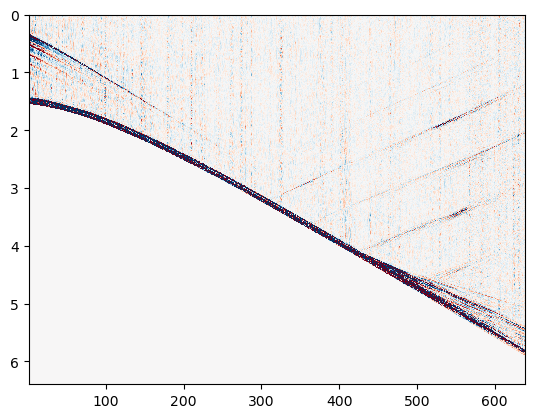

In [24]:
# shot 1 line 1 
#signals = get_receivers_data(1,0)    # signal from all the receivers from line 1 
#signals = signals                    # scale the signal (by dividing 100)
#print(signals.shape)
x = np.arange(data.shape[1])*2e-3
y = np.arange(1,receivers_per_line+1)
#X,Y = np.meshgrid(x,y)

import matplotlib.colors as mcolors
#cmap = mcolors.LinearSegmentedColormap.from_list('blue_red', ['blue', 'red'])
#cmap = plt.colormaps['PiYG']
plt.pcolormesh(y,x, signal.T, shading='auto', cmap='RdBu_r')
plt.clim([-0.25, 0.25])
plt.ylim(x[-1],x[0])


In [17]:
def plot_seismic_data(data):
    """
    Plots a single figure for seismic data.

    Parameters:
    data (np.ndarray): The input data array with shape (NY, NX) where NY = number of time samples and NX = number of receivers.
    """
    NR, NT = data.shape  # Get the number of receivers (x-axis) and time samples (y-axis)

    receiver_numbers = np.arange(1, NR + 1)  # Receiver numbers
    time_values = np.arange(0, NT) * (1 / 500)  # Time values assuming fs = 500 Hz

    # Create the figure
    plt.figure(figsize=(12, 8))  # Size of the figure

    # Plot the seismic data
    c = plt.pcolormesh(receiver_numbers, time_values, data.T, shading='auto', cmap='RdBu_r')
    plt.title('Seismic Data')
    plt.xlabel('Receiver #')  # X-axis for receiver numbers
    plt.ylabel('Time (s)')  # Y-axis for time in seconds
    plt.xlim(receiver_numbers[0], receiver_numbers[-1])  # Limits for x-axis
    plt.ylim(time_values[-1], time_values[0])  # Invert y-axis for time

    plt.clim([-0.25, 0.25])

    # # Set dynamic color limits based on data
    # vmin = np.min(data)  # Minimum value in the data
    # vmax = np.max(data)  # Maximum value in the data
    # plt.clim(vmin, vmax)  # Apply the dynamic color limits
    plt.colorbar(label='Amplitude')  # Colorbar for the plot

    # Increase font size for visibility
    plt.rcParams.update({'font.size': 15})

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('fig_seismic_data.pdf')
    plt.show()

